In [ ]:
!pip install lime
!pip install pandas

the warning that is seen in the results below are from setting the numeric values of race on a copy of a slice of the original dataset. without making a completely new dataset with these numeric values that is a very hard issue to get around and in the end it doesn't effect the results or acurracy so it can just be ignored or you can go to the link to silence the warning. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sex              4743 non-null   object
 1   age              4743 non-null   int64 
 2   race             4743 non-null   object
 3   juv_fel_count    4743 non-null   int64 
 4   decile_score     4743 non-null   int64 
 5   juv_misd_count   4743 non-null   int64 
 6   juv_other_count  4743 non-null   int64 
 7   priors_count     4743 non-null   int64 
 8   c_charge_degree  4743 non-null   object
 9   decile_score.1   4743 non-null   int64 
 10  v_decile_score   4743 non-null   int64 
 11  priors_count.1   4743 non-null   int64 
 12  two_year_recid   4743 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 481.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ----

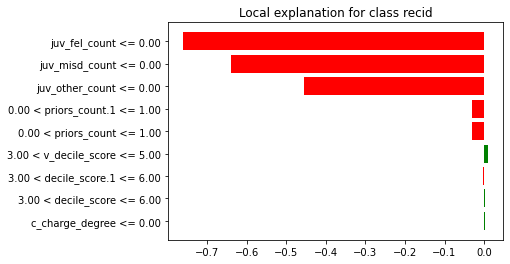

In [2]:
from __future__ import print_function
import lime
import lime.lime_tabular
import sklearn.ensemble
import sklearn.metrics
from lime import lime_text
from lime.lime_text import LimeTextExplainer
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import sklearn.feature_extraction 
import seaborn as sns
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import pickle

#remove the warning that comes with assigning the race values to slices
pd.options.mode.chained_assignment = None

compas = pd.read_csv("/content/compas-scores-two-years-violent.csv")
#compas = pd.read_csv("C:/Users/Chick/PycharmProjects/thesis research/compas.csv")
compasfeat = compas.drop([ 'id', 'name', 'first', 'last', 'compas_screening_date',
                          'dob', 'age_cat',  'days_b_screening_arrest', 'c_jail_in','c_jail_out','c_case_number',
                          'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
                          'c_charge_desc', 'is_recid', 'r_case_number','r_charge_degree','r_days_from_arrest', 'r_offense_date',
                          'r_charge_desc', 'r_jail_in','r_jail_out','violent_recid','is_violent_recid', 'vr_case_number','vr_charge_degree', 'vr_offense_date', 'vr_charge_desc','type_of_assessment',
                          'score_text', 'screening_date', 'v_type_of_assessment', 'v_score_text',
                          'v_screening_date', 'in_custody', 'out_custody','start', 'end', 'event',
                          'two_year_recid.1'], axis=1)
print(compasfeat.info())
le = preprocessing.LabelEncoder()
compasfeat.race[compasfeat.race == 'African-American'] = 1
compasfeat.race[compasfeat.race == 'Caucasian'] = 0
compasfeat.race[compasfeat.race == 'Hispanic'] = 2
compasfeat.race[compasfeat.race == 'Asian'] = 3
compasfeat.race[compasfeat.race == 'Other'] = 4
compasfeat.race[compasfeat.race == 'Native American'] = 5
compasfeat['sex'] = le.fit_transform(compasfeat['sex'].values)
compasfeat['c_charge_degree'] = le.fit_transform(compasfeat['c_charge_degree'].values)

predict = "two_year_recid"

#test figure for displaying in the model
i= 66




###############################################################three models on the third dataset################################################################

#modify features of dataset
nopredcompas = compasfeat.drop(["race", "age", "sex"], axis=1)
print("No compas: ",nopredcompas.info())
nopX = np.array(nopredcompas.drop([predict], 1))
nopY = np.array(nopredcompas[predict])

#model
for _ in range(35):
    X_Train, X_Test, Y_Train, Y_Test = sklearn.model_selection.train_test_split(nopX, nopY, test_size=.20)

    #build the model
    from sklearn.naive_bayes import GaussianNB
    nopredgnb = GaussianNB()
    nopredgnb.fit(X_Train, Y_Train)
    nopredgnbacc = nopredgnb.score(X_Test, Y_Test)

nopredexplainer = lime.lime_tabular.LimeTabularExplainer(X_Train, mode='classification', feature_names = nopredcompas.columns.values, class_names=['no recid', 'recid'], verbose=True, discretize_continuous=True, discretizer='quartile')
print("\nGaussian Naive Bayes classifier accuracy: ", round(nopredgnbacc*100, 2), "prediction: ", nopredgnb.predict(X_Test[i].reshape(1, -1)), "Predict probability: ", nopredgnb.predict_proba(X_Test[i].reshape(1, -1)))

print("prisoner information no prejudice bias:\n", X_Test[i],Y_Test[i])
print("No predjudice bias GNB: ")
nopredgnbexp = nopredexplainer.explain_instance(X_Test[i], nopredgnb.predict_proba, num_features=len(nopredcompas.columns))
img = nopredgnbexp.as_pyplot_figure()
img.savefig('gnb1-3', format='pdf',bbox_inches='tight')
plt.show()